# Data Wrangling project using Twitter API 

By Dmytro Shapiro

Data January 1/4/2019

## Step 1: Gathering Data 

In [1]:
#import libraries to be used
import pandas as pd
import numpy as np
import os 
import requests
import tweepy
from tweepy import OAuthHandler
import json 
import csv
import sys
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the twitter archive csv file as df
# Check it was read properly

df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Download dog images prediction based on a neural network that can classify breeds of dogs.

In [3]:
# Programmatically download dog images prediction file from Udacity server using request library
# Get "Response 200" meaning for successful connection

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)   

with open('image-prediction.tsv', mode ='wb') as file:
    file.write(response.content)
    
    
# Read tsv file with image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

<Response [200]>


Query the Twitter API for each tweet's JSON data using Tweepy library and download tweet JSON data into a file.

In [4]:
# authentication code. API keys was takend from requesting and creating developer account in twitter.
consumer_key = 'H6F7rsQkuiYw9JiHHXzNLFvyw'
consumer_secret = 'gErjQcwlahDx3qzTo0APn8Z2t2A1lal8cx66qXBhGBdynDCtk0'
access_token = '2250607409-NycYJUC6cr6VX4ZycuIUixeyKYtEu8znEr1GfQk'
access_secret = '2tbD8Xl7V0tbxZFiy2BxkknANA4gc1Xad9WEmp1xZNaNS'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Using a code timer were both helpful for sanity reasons
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)



In [5]:
# Download Tweepy status object based on Tweet ID and store in 2 lists,
# One for successful download and another for errors. Those might have been deleted
list_of_tweets = []
cant_find_tweets_for_those_ids = []
tweet_ids = list(df.tweet_id)
for tweet in tweet_ids:   
    try:
        list_of_tweets.append(api.get_status(tweet))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet)

Rate limit reached. Sleeping for: 311


Rate limit reached. Sleeping for: 758


In [6]:
# Download json onto a list 
list_of_dicts = []
for json_tweet in list_of_tweets:
    list_of_dicts.append(json_tweet)

In [7]:
# Write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [8]:
# Cleand and isolate information from txt and put it into JSON
demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [10]:
# save the gathered tweet_json file each record in a separate row, not the whole data without separation

tweet_json1 = tweet_json.to_csv('tweet_json.csv')

In [11]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38042,8321,7603067,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32661,6148,7603067,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24585,4069,7603067,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41399,8460,7603067,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39574,9163,7603067,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


## Step 2: Assessing data visually and programmatically

In [12]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Check for duplicate tweets
sum(df['tweet_id'].duplicated())

0

In [15]:
df.rating_numerator.value_counts(ascending = True)

204       1
121       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
143       1
182       1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
26        1
24        1
20        1
80        1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [16]:
# Check what are those tweets with high numerator about
print(df.loc[df.rating_numerator == 420, 'text']) 
print(df.loc[df.rating_numerator == 144, 'text']) 
print(df.loc[df.rating_numerator == 182, 'text']) 
print(df.loc[df.rating_numerator == 88, 'text'])
print(df.loc[df.rating_numerator == 165, 'text'])

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object


In [17]:
df.rating_denominator.value_counts(ascending = True)

0         1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
70        1
40        1
16        1
2         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

In [18]:
print(df.loc[df.rating_denominator == 0, 'text']) 
print(df.loc[df.rating_denominator == 7, 'text']) 
print(df.loc[df.rating_denominator == 170, 'text']) 
print(df.loc[df.rating_denominator == 150, 'text'])
print(df.loc[df.rating_denominator == 130, 'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object


In [19]:
# Check out rare cases where numerator is not a whole number
with pd.option_context('max_colwidth', 200):
    print(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

                tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 1

D:\Data Wrangling\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
1114,724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
1637,806542213899489280,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,vizsla,0.938617,True,Brittany_spaniel,0.036739,True,Chesapeake_Bay_retriever,0.003971,True
1069,716080869887381504,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,1,golden_retriever,0.638625,True,chow,0.254717,True,Tibetan_mastiff,0.071732,True
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
989,707969809498152960,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,toy_poodle,0.908491,True,miniature_poodle,0.082652,True,teddy,0.005786,False


In [23]:
sum(image_prediction.jpg_url.duplicated())

66

In [40]:
# Assess duplicates
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [46]:
# Assess the accuracy of prediction for each image
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [47]:
# Assess number of pictures in each tweet. 4 picture is the MAX for one tweet
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [48]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38042,8321,7603067,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32661,6148,7603067,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24585,4069,7603067,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41399,8460,7603067,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39574,9163,7603067,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [49]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 8 columns):
tweet_id            2340 non-null object
favorite_count      2340 non-null int64
retweet_count       2340 non-null int64
followers_count     2340 non-null int64
friends_count       2340 non-null int64
source              2340 non-null object
retweeted_status    2340 non-null object
url                 2340 non-null object
dtypes: int64(4), object(4)
memory usage: 146.3+ KB


In [50]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2046,671163268581498880,1685,1137,7603385,12,Twitter for iPhone,Original tweet,https://t.co/U7DQQdZ0mX
596,797971864723324932,12485,3449,7603160,12,Twitter for iPhone,Original tweet,https://t.co/GRWPgNKt2z
864,760656994973933572,6995,2084,7603164,12,Twitter for iPhone,Original tweet,https://t.co/tl3gNYdoq2
1821,676089483918516224,1357,451,7603374,12,Twitter for iPhone,Original tweet,https://t.co/Cuz0Osnekp
182,855862651834028034,352,28,7603072,12,Twitter for iPhone,Original tweet,h
2317,666337882303524864,193,90,7603392,12,Twitter for iPhone,Original tweet,https://t.co/QpRjllzWAL
2049,671151324042559489,682,158,7603385,12,Twitter for iPhone,Original tweet,https://t.co/NKHx0pcOii
2229,667885044254572545,824,499,7603390,12,Twitter for iPhone,Original tweet,https://t.co/7rkYZQdKEd
2274,667171260800061440,221,91,7603390,12,Twitter for iPhone,Original tweet,https://t.co/6RHNRsByOY
1175,718234618122661888,4045,1067,7603179,12,Twitter for iPhone,Original tweet,https://t.co/05S8oYztgb


Quality Issues:

Tweeter Archive **table** (df).

1. Retweeted tweets are counted too. (Done)
2. Dog names recorder wrong. (Done)
3. Timestamp recorded as year/month/day. (Done)
4. Some numerator which aren't whole number in text are messed up. (Done)

Image Prediction **table**:

1. Dog bread guess(p1, p2, p3) isn't capitilized. (Done)
2. Dog bread guess(p1, p2, p3) has "__" as seperater. (Done)
3. Duplicates exist. (Done)

Tweet json **table**:

1. Duplicates exist. (Done)

Tidiness Issues:

1. Change numerator and denominator data type from int to float. (Done)
2. Change tweet_id to type int64 in tweeet_json table to match other tabes. (Done)
3. Join all tables to one.




## Step 3: Cleaning data

In [51]:
df_clean = df.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()


### 1. Retweeted tweets are counted too. ###

#### _Define_ ####

Delete retweets.

#### _Code_ ####

In [52]:
#Filter out Tweets where retweeted status is not null.

df_clean = df_clean[pd.isnull(df['retweeted_status_user_id'])]

#### _Test_  ####

In [53]:
print(sum(df_clean.retweeted_status_user_id.value_counts()))

0


### 2. Dog names recorder wrong. ###

#### _Define_ ####

Based on assess data steps identify which are the most popular mistakes in dog name column and replace it with None

#### _Code_ ####

In [54]:
df_clean.name.value_counts()

None         680
a             55
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
the            8
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Bo             6
Bella          6
Oscar          6
Jax            6
Koda           6
Bailey         6
Stanley        6
an             6
Chester        5
Bentley        5
Buddy          5
Rusty          5
Scout          5
Milo           5
Dave           5
Leo            5
            ... 
Eve            1
Todo           1
Ruffles        1
Florence       1
Blue           1
Bode           1
Alexander      1
Barry          1
Tonks          1
Toffee         1
Anthony        1
Brownie        1
Buckley        1
Moofasa        1
Iroh           1
Tyrone         1
Jeb            1
Birf           1
Coleman        1
Dug            1
Fillup         1
all            1
Jareld         1
Arnold         1
Huxley         1
Kona           1
Pete           1
Banjo         

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Lola         8
Sadie        8
Winston      8
the          8
Daisy        7
Toby         7
Stanley      6
Oscar        6
Bella        6
Bailey       6
Koda         6
an           6
Jax          6
Bo           6
Rusty        5
Leo          5
Bentley      5
Buddy        5
Milo         5
Chester      5
Scout        5
Louis        5
          ... 
Ginger       1
Kevon        1
Ken          1
Meera        1
Rueben       1
Banjo        1
Duchess      1
by           1
Miguel       1
Mike         1
Tessa        1
Rilo         1
Karll        1
Remus        1
Laela        1
Timofy       1
Beebop       1
Jeremy       1
Karma        1
Lucky        1
Mona         1
Grady        1
Rolf         1
Chevy        1
Tilly        1
Huck         1
Creg         1
Dixie        1
Ralphie      1
Arya         1
Name: name, Length: 956, dtype: int64

In [55]:
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("O",'None', inplace=True)
df_clean['name'].replace("quite",'None', inplace=True)
df_clean['name'].replace("such",'None', inplace=True)
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)


#### _Test_  ####

In [56]:
df_clean.name.value_counts()

None       779
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
Toby         7
Daisy        7
Bella        6
Koda         6
Oscar        6
Jax          6
Stanley      6
Bailey       6
Bo           6
Rusty        5
Louis        5
Buddy        5
Leo          5
Scout        5
Bentley      5
Chester      5
Milo         5
Dave         5
Gary         4
Derek        4
          ... 
Saydee       1
Ginger       1
Kevon        1
Ken          1
Rueben       1
Duchess      1
Beckham      1
Ralphie      1
Asher        1
Miguel       1
Mike         1
Tessa        1
Rilo         1
Karll        1
Remus        1
Laela        1
Timofy       1
Beebop       1
Jeremy       1
Karma        1
Lucky        1
Mona         1
Grady        1
Rolf         1
Chevy        1
Tilly        1
Huck         1
Creg         1
Dixie        1
General      1
Name: name, Length: 936, dtype: int64

### 3. Timestamp recorded as year/month/ ###

#### _Define_ ####

Separate timestamp into 3 columns.

#### _Code_ ####

In [57]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

df_clean = df_clean.drop('timestamp', 1)

In [58]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day']

#### Test ####

In [59]:
df_clean.info()
df_clean.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
year                          2175 non-null int64
month                         2175 non-

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,1


### 4. Some numerators which aren't whole number in text are messed up. ###

#### _Define_ ####

Convert numerators and denominators to float.
Update the numbers.

#### _Code_ ####

In [60]:
df[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)

df_clean.loc[(df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_clean.loc[(df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_clean.loc[(df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_clean.loc[(df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test ####

In [61]:
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

NameError: name 'display' is not defined

### 1. Dog bread guess(p1, p2, p3) isn't capitilized.. ###

#### _Define_ ####

Make p1 p2 p3 capitlized.

#### _Code_ ####

In [62]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.title()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.title()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.title()

#### Test ####

In [63]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


### 2. Dog bread guess(p1, p2, p3) has "__" as seperater. ###

#### _Define_ ####

Replace the underscore with _space_.

#### _Code_ ####


In [64]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.replace('_', ' ')
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.replace('_', ' ')
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.replace('_', ' ')

#### Test ####

In [65]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


### 3. Duplicates exist in the image prediciton data frame. ###

#### _Define_ ####

Delete duplicates.

#### _Code_ ####

In [66]:
# Drop tweets with duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test ####

In [67]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

### 3. Duplicates exist in the tweet json data frame. ###

#### _Define_ ####

Delete duplicates.

#### _Code_ ####

In [68]:
# Keep only those records where retweeted_status is "Origianal tweet" and not "This is a retweet"
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test ####

In [69]:
tweet_json_clean.loc[tweet_json_clean['retweeted_status'] == 'This is a retweet']

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url


## Tidiness Issues ##

### 1. Change numerator and denominator data type from int to float ###

#### _Define_ ####

Change the type using "astype" function.

#### _Code_ ####

In [70]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Test ####

In [71]:
df_clean['rating_numerator'].dtypes

dtype('float64')

In [72]:
df_clean['rating_denominator'].dtypes

dtype('float64')

### 2.Change tweet_id to type int64 in tweeet_json table to match other tabes. ###

#### _Define_ ####

Change the type using "astype" function.

#### _Code_ ####

In [73]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(np.int64)

#### Test ####

In [74]:
tweet_json_clean['tweet_id'].dtypes 

dtype('int64')

### 3. Join all tables to one. ###

In [75]:
# create new data frame which merges arhive and image prediciton
df_semi_final = pd.merge(df_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

# drop those without pics
df_semi_final = df_semi_final[df_semi_final['jpg_url'].notnull()]

#### Test ####

In [76]:
df_semi_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2174
Data columns (total 30 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null float64
rating_denominator            1928 non-null float64
name                          1928 non-null object
doggo                         1928 non-null object
floofer                       1928 non-null object
pupper                        1928 non-null object
puppo                         1928 non-null object
year                          1928 non-null int64
month                         1928 

In [77]:
# Final df with merged json file

df_final = pd.merge(df_semi_final, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])



#### Test ####

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 37 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source_x                      1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null float64
rating_denominator            1928 non-null float64
name                          1928 non-null object
doggo                         1928 non-null object
floofer                       1928 non-null object
pupper                        1928 non-null object
puppo                         1928 non-null object
year                          1928 non-null int64
month                         1928 

In [79]:
df_final

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,...,Banana,0.076110,False,38042.0,8321.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,...,Papillon,0.068957,True,32661.0,6148.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,...,Kelpie,0.031379,True,24585.0,4069.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,...,Spatula,0.040836,False,41399.0,8460.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,...,German Short-Haired Pointer,0.175219,True,39574.0,9163.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,...,Indian Elephant,0.076902,False,19873.0,3046.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,...,Ice Lolly,0.193548,False,11619.0,2020.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,...,Pembroke,0.076507,True,64200.0,18464.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,...,Chesapeake Bay Retriever,0.118184,True,27312.0,4188.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,...,Chihuahua,0.029248,True,31333.0,7217.0,7603067.0,12.0,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


#### To analyze data I would like to get rid of some of some unnecessary  data #### 

In [80]:
df_analysis = df_final.drop(['in_reply_to_status_id',
                             'in_reply_to_user_id',
                             'source_x',
                             'friends_count',
                             'retweeted_status_timestamp',
                             'text',
                             'retweeted_status_id',
                             'retweeted_status_user_id',
                             'expanded_urls',
                             'jpg_url',
                             'img_num',
                             'p2',
                             'p2_conf',
                             'p2_dog',
                             'p3',
                             'p3_conf',
                             'p3_dog',
                             'source_y',
                             'retweeted_status',
                             'followers_count',
                             'url'], 1)

In [81]:
df_analysis

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,13.0,10.0,Phineas,None,None,None,None,2017,8,1,Orange,0.097049,False,38042.0,8321.0
1,892177421306343426,13.0,10.0,Tilly,None,None,None,None,2017,8,1,Chihuahua,0.323581,True,32661.0,6148.0
2,891815181378084864,12.0,10.0,Archie,None,None,None,None,2017,7,31,Chihuahua,0.716012,True,24585.0,4069.0
3,891689557279858688,13.0,10.0,Darla,None,None,None,None,2017,7,30,Paper Towel,0.170278,False,41399.0,8460.0
4,891327558926688256,12.0,10.0,Franklin,None,None,None,None,2017,7,29,Basset,0.555712,True,39574.0,9163.0
5,891087950875897856,13.0,10.0,None,None,None,None,None,2017,7,29,Chesapeake Bay Retriever,0.425595,True,19873.0,3046.0
6,890971913173991426,13.0,10.0,Jax,None,None,None,None,2017,7,28,Appenzeller,0.341703,True,11619.0,2020.0
7,890729181411237888,13.0,10.0,None,None,None,None,None,2017,7,28,Pomeranian,0.566142,True,64200.0,18464.0
8,890609185150312448,13.0,10.0,Zoey,None,None,None,None,2017,7,27,Irish Terrier,0.487574,True,27312.0,4188.0
9,890240255349198849,14.0,10.0,Cassie,doggo,None,None,None,2017,7,26,Pembroke,0.511319,True,31333.0,7217.0


### Storing and Acting on Wrangled Data ###

In [82]:
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('twitter_archive_clean.csv')
image_prediction.to_csv('image_prediction_master.csv')
tweet_json_clean.to_csv('tweet_json_master.csv')
df_final.to_csv('MASTER_FILE.csv')
df_analysis.to_csv('analysis_master.csv')

#### Insight 1 ####

In [83]:
print("Descriptive Statistics")
stat = df_analysis.drop(['tweet_id'], axis = 1)

stat.describe()

Descriptive Statistics


,rating_numerator,rating_denominator,year,month,day,p1_conf,favorite_count,retweet_count
count,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1926.000000,1926.000000
mean,12.248330,10.550311,2015.841286,7.143672,16.053423,0.593835,8135.984943,2408.733645
std,42.174881,7.444349,0.701926,4.129784,8.940485,0.273084,11938.068726,4248.801651
min,0.000000,2.000000,2015.000000,1.000000,1.000000,0.044333,78.000000,12.000000
25%,10.000000,10.000000,2015.000000,3.000000,8.000000,0.360137,1786.250000,579.000000
50%,11.000000,10.000000,2016.000000,7.000000,16.000000,0.587635,3724.000000,1223.000000
75%,12.000000,10.000000,2016.000000,11.000000,24.000000,0.848562,9864.000000,2741.500000
max,1776.000000,170.000000,2017.000000,12.000000,31.000000,1.000000,164335.000000,83690.000000


#### Some Key points ####

1. Mean confidence coefficient for the neural network for is 0.59.
2. There is 1928 observations.
3. There is a dog with 164,348 likes count which is impressive.
4. 1776 is the highest rating numerator.

### Insight 1 ###

In [84]:
df_analysis[df_analysis['favorite_count']==164348]

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,p1,p1_conf,p1_dog,favorite_count,retweet_count


This is a Labrador Retriever who has the highest number of likes!

### Insight 2 ###

Let's explore which dog got the highest numerator rating.

In [85]:
df_analysis[df_analysis['rating_numerator']==1776]

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,p1,p1_conf,p1_dog,favorite_count,retweet_count
684,749981277374128128,1776.0,10.0,Atticus,None,None,None,None,2016,7,4,Bow Tie,0.533941,False,5381.0,2637.0


In [86]:
image_prediction_clean[image_prediction_clean['tweet_id']==749981277374128128].jpg_url

1270    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

It is cute doggo who celebrates Independence day! That is why his rank is so high!

### Insight 3 ###

In [87]:
df_dog_type_count = df_analysis.groupby('p1').count()
test = df_dog_type_count.sort_values(['tweet_id'], ascending=[0])
print(test)

                           tweet_id  rating_numerator  rating_denominator  \
p1                                                                          
Golden Retriever                128               128                 128   
Labrador Retriever               90                90                  90   
Pembroke                         87                87                  87   
Chihuahua                        75                75                  75   
Pug                              52                52                  52   
Chow                             38                38                  38   
Pomeranian                       38                38                  38   
Samoyed                          37                37                  37   
Toy Poodle                       37                37                  37   
Malamute                         28                28                  28   
French Bulldog                   26                26                  26   

Although Labrador Retriever was a dog with the highest likes count, Golden Retriever is the most popular dog! Let's visualize this table!

In [88]:
df_dog_type_count = df_analysis.groupby('p1').count()


### Vizulaization ###

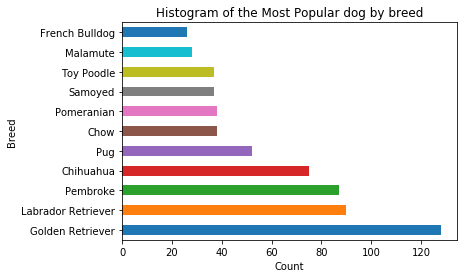

In [91]:
df_dog_type = df_analysis.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Popular dog by breed')
plt.xlabel('Count')
plt.ylabel('Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

D:\Data Wrangling\venv\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

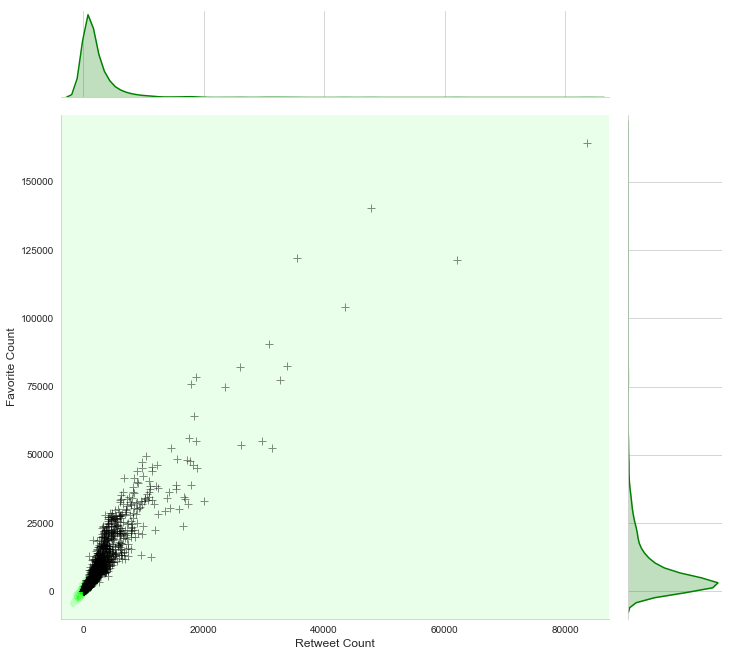

In [92]:
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_analysis, 
                  color="green",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.subtitle('Correlation between the retweet & favorite counts',
                 fontsize=16)

References

http://support.gnip.com/articles/identifying-and-understanding-retweets.html

http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.read_json.html

https://stackoverflow.com/questions/13707457/python-value-that-occurs-the-most-in-a-list

https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

https://chrisalbon.com/python/pandas_join_merge_dataframe.html

https://gwu-libraries.github.io/sfm-ui/posts/2016-11-10-twitter-interaction